In [5]:
import sys
import gym
import numpy as np
from collections import defaultdict

from plot_utils import plot_policy, plot_blackjack_values

In [255]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
print(env.observation_space, env.action_space)

action_dict = {
                'key': 'value',
                0: 'Left',
                1: 'Down',
                2: 'Right',
                3: 'Up'
}

N = 3
for episode in range(N):
    state = env.reset()
    while True:
        action = env.action_space.sample()
        print(f"state: {state}, action: {action_dict[action]}")
        state, reward, done, info = env.step(action)
        if done:
            print('==========')
            print('End game! Reward: ', reward)
            print('You won :)\n') if reward > 0 else print('You lost :(\n')
            break

Discrete(16) Discrete(4)
state: 0, action: Left
state: 0, action: Left
state: 0, action: Up
state: 0, action: Up
state: 0, action: Left
state: 0, action: Left
state: 0, action: Left
state: 0, action: Right
state: 1, action: Right
state: 2, action: Up
state: 2, action: Down
state: 6, action: Up
state: 2, action: Right
state: 3, action: Up
state: 3, action: Down
End game! Reward:  0.0
You lost :(

state: 0, action: Right
state: 1, action: Left
state: 0, action: Left
state: 0, action: Right
state: 1, action: Right
state: 2, action: Left
state: 1, action: Up
state: 1, action: Left
state: 0, action: Up
state: 0, action: Left
state: 0, action: Right
state: 1, action: Left
state: 0, action: Left
state: 0, action: Right
state: 1, action: Right
state: 2, action: Up
state: 2, action: Up
state: 2, action: Right
state: 3, action: Left
state: 2, action: Left
state: 1, action: Down
End game! Reward:  0.0
You lost :(

state: 0, action: Down
state: 4, action: Right
End game! Reward:  0.0
You lost :(



In [261]:
env = gym.make('Blackjack-v1')
print(env.observation_space)
print(env.action_space)

'''
Each state is a 3-tuple of:
    1. the player's current sum ,
    2. the dealer's face up card , and
    3. whether or not the player has a usable ace (no , yes ).

The agent has two potential actions:
    STICK = 0
    HIT = 1
'''

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


"\nEach state is a 3-tuple of:\n    1. the player's current sum ,\n    2. the dealer's face up card , and\n    3. whether or not the player has a usable ace (no , yes ).\n\nThe agent has two potential actions:\n    STICK = 0\n    HIT = 1\n"

In [250]:
def random_policy(obj_env):
    history = []
    state = obj_env.reset()
    while True:
        # probs = [0.8, 0.2] if state[0] > 18 else [0.2, 0.8]
        action = np.random.choice(range(env.action_space.n))
        state, reward, done, info = obj_env.step(action)
        history.append((state, action, reward))
        if done:
            break
    return history

In [262]:
for i in range(3):
    episode = random_policy(env)
    print(episode)

[((22, 7, False), 1, -1.0)]
[((21, 7, False), 1, 0.0), ((21, 7, False), 0, 1.0)]
[((12, 8, False), 0, -1.0)]


In [252]:
def mc_Q_table(env, num_episodes, generate_episode, gamma=1.0):

    returns_sum = defaultdict(lambda: np.zeros(env.action_space.n))
    N = defaultdict(lambda: np.zeros(env.action_space.n))
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    for i_episode in range(1, num_episodes+1):

        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")

        episode = generate_episode(env)
        states, actions, rewards = zip(*episode)

        discounts = np.array([gamma**i for i in range(len(rewards)+1)])

        for i, state in enumerate(states):
            returns_sum[state][actions[i]] += sum(rewards[i:]*discounts[:-(1+i)])
            N[state][actions[i]] += 1.0
            Q[state][actions[i]] = returns_sum[state][actions[i]] / N[state][actions[i]]

    return Q

Episode 5000/5000.

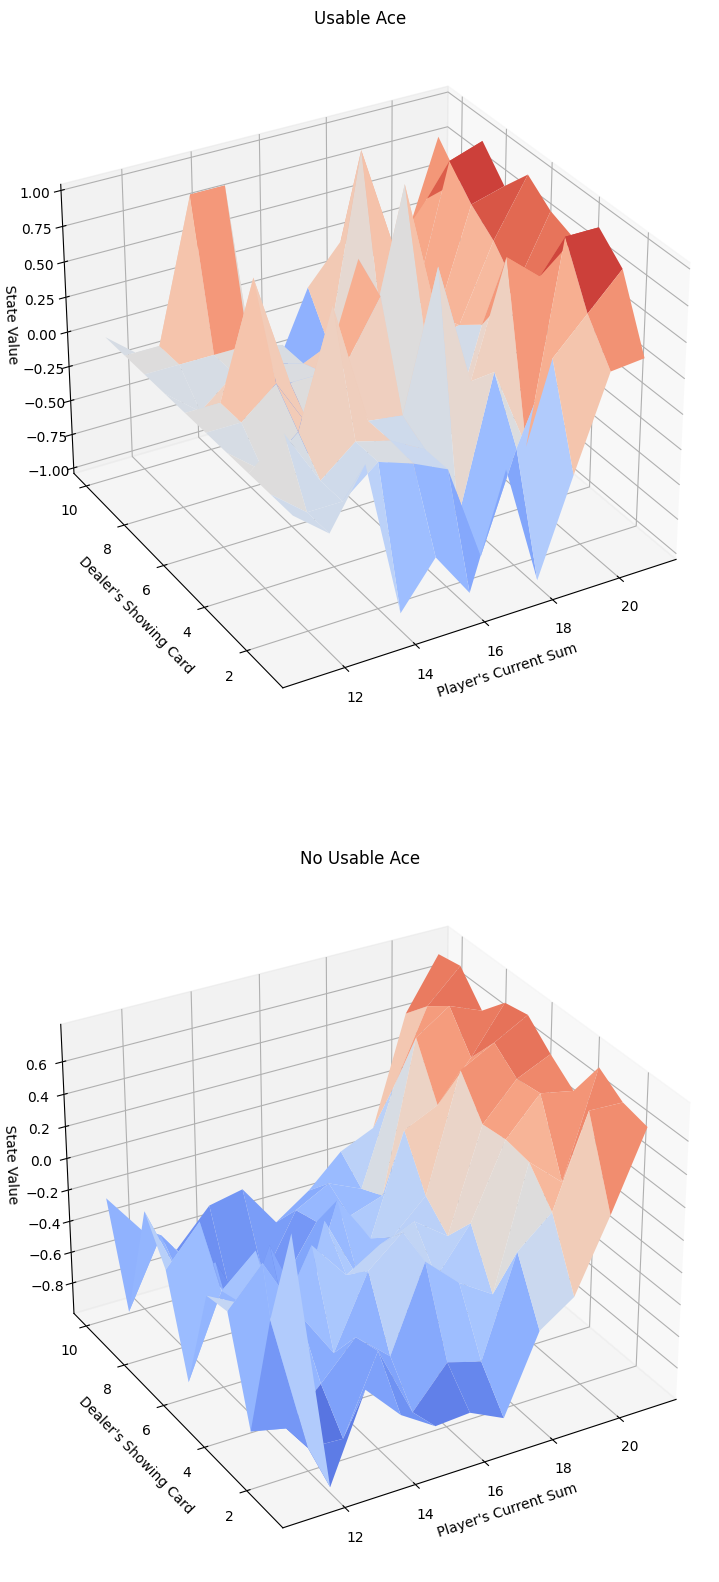

In [263]:
Q = mc_Q_table(env, 5000, random_policy)

# obtain the corresponding state-value function
V_to_plot = dict((k,(k[0]>18)*(np.dot([0.8, 0.2],v)) + (k[0]<=18)*(np.dot([0.2, 0.8],v))) \
         for k, v in Q.items())

# plot the state-value function
plot_blackjack_values(V_to_plot)

In [264]:
Q.keys()

dict_keys([(14, 10, False), (22, 10, False), (17, 6, False), (18, 10, False), (19, 10, False), (12, 3, False), (25, 1, False), (22, 2, False), (18, 3, False), (21, 4, True), (18, 8, False), (15, 2, False), (25, 2, False), (21, 10, False), (19, 3, False), (12, 4, False), (15, 4, False), (22, 3, False), (16, 4, False), (16, 10, True), (21, 9, False), (31, 9, False), (17, 10, False), (12, 1, False), (12, 6, False), (21, 6, False), (25, 9, False), (16, 3, False), (27, 3, False), (21, 2, True), (20, 4, False), (24, 10, False), (11, 6, False), (20, 10, False), (20, 5, False), (9, 10, False), (19, 2, False), (16, 7, True), (25, 4, False), (13, 10, True), (23, 3, False), (18, 6, False), (10, 10, False), (13, 10, False), (22, 8, False), (30, 2, False), (21, 5, False), (17, 4, False), (26, 1, False), (15, 10, False), (16, 10, False), (23, 9, False), (16, 1, False), (20, 8, False), (6, 5, False), (17, 5, False), (25, 5, False), (20, 7, False), (28, 7, False), (30, 3, False), (12, 10, False), (30,